In [1]:
import shutil
import os
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../Datasets/list_attr_celeba.csv")
attributes = df.columns.tolist()
print(attributes)
print(f"{df['image_id']}, {df['Male']}, {df['No_Beard']}") # 1 is no_beard and -1 is beard , 1 is Male and -1 is Female

['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
0         000001.jpg
1         000002.jpg
2         000003.jpg
3         000004.jpg
4         000005.jpg
             ...    
202594    202595.jpg
202595    202596.jpg
202596    202597.jpg
202597    202598.jpg
202598    202599.jpg
Name: image_id, Length: 202599, dtype: object, 0        -1
1        -1
2         1
3        -1
4        -1
         ..
202594   -1
202595    1
202596    1
202597   -1
20259

In [4]:
df_filtered = df[['image_id', 'Male', 'No_Beard']]

print(df_filtered)

          image_id  Male  No_Beard
0       000001.jpg    -1         1
1       000002.jpg    -1         1
2       000003.jpg     1         1
3       000004.jpg    -1         1
4       000005.jpg    -1         1
...            ...   ...       ...
202594  202595.jpg    -1         1
202595  202596.jpg     1         1
202596  202597.jpg     1         1
202597  202598.jpg    -1         1
202598  202599.jpg    -1         1

[202599 rows x 3 columns]


/tmp/ipykernel_20305/2611986415.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('No_Beard', group_keys=False).apply(lambda x: x.sample(min(len(x), 4000), random_state=42))


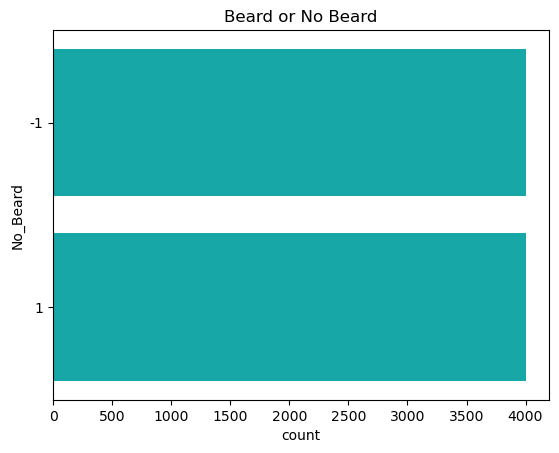

[1]


No_Beard
-1    4000
 1    4000
Name: count, dtype: int64

In [5]:
df_filtered = df_filtered[df_filtered['Male'] == 1]
# df_filtered = df_filtered.iloc[:2500]

df_sampled = df_filtered.groupby('No_Beard', group_keys=False).apply(lambda x: x.sample(min(len(x), 4000), random_state=42))

plt.title('Beard or No Beard')
sns.countplot(y=df_sampled['No_Beard'], color="c")
plt.show()
# df_filtered['No_Beard'].value_counts()
print(df_sampled['Male'].unique())
df_sampled['No_Beard'].value_counts()

In [6]:
source_folder = "../Datasets/img_align_celeba/img_align_celeba"
beard_folder = "Beard/"
no_beard_folder = "No_Beard/"

os.makedirs(beard_folder, exist_ok=True)
os.makedirs(no_beard_folder, exist_ok=True)

for _, row in df_sampled.iterrows():
    image_name = row['image_id']
    no_beard = row['No_Beard']
    
    source_path = os.path.join(source_folder, image_name)
    
    if no_beard == 1:
        target_path = os.path.join(no_beard_folder, image_name)
    else:
        target_path = os.path.join(beard_folder, image_name)
    
    if os.path.exists(source_path):
        shutil.copy(source_path, target_path)
    else:
        print(f"File not found: {source_path}")

In [7]:
source_beard_folder = "Beard/"
source_no_beard_folder = "No_Beard/"

train_folder = "Train/"
val_folder = "Validate/"
test_folder = "Test/"

os.makedirs(os.path.join(train_folder, "Beard"), exist_ok=True)
os.makedirs(os.path.join(train_folder, "No Beard"), exist_ok=True)
os.makedirs(os.path.join(val_folder, "Beard"), exist_ok=True)
os.makedirs(os.path.join(val_folder, "No Beard"), exist_ok=True)
os.makedirs(os.path.join(test_folder, "Beard"), exist_ok=True)
os.makedirs(os.path.join(test_folder, "No Beard"), exist_ok=True)

def move_images(images, source_folder, target_folder):
    for image in images:
        source_path = os.path.join(source_folder, image)
        
        if os.path.isfile(source_path):
            target_path = os.path.join(target_folder, image)
            shutil.copy(source_path, target_path)
        else:
            print(f"Skipped: {source_path} (It's a dir not a file)")

beard_images = os.listdir(source_beard_folder)
no_beard_images = os.listdir(source_no_beard_folder)

beard_train, beard_temp = train_test_split(beard_images, test_size=0.2, random_state=42)
beard_val, beard_test = train_test_split(beard_temp, test_size=0.5, random_state=42)

no_beard_train, no_beard_temp = train_test_split(no_beard_images, test_size=0.2, random_state=42)
no_beard_val, no_beard_test = train_test_split(no_beard_temp, test_size=0.5, random_state=42)

move_images(beard_train, source_beard_folder, os.path.join(train_folder, "Beard"))
move_images(beard_val, source_beard_folder, os.path.join(val_folder, "Beard"))
move_images(beard_test, source_beard_folder, os.path.join(test_folder, "Beard"))

move_images(no_beard_train, source_no_beard_folder, os.path.join(train_folder, "No Beard"))
move_images(no_beard_val, source_no_beard_folder, os.path.join(val_folder, "No Beard"))
move_images(no_beard_test, source_no_beard_folder, os.path.join(test_folder, "No Beard"))